# Date time with pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
sns.set_style("white")

## Today
many ways to write todays date
- pd.to_datetime

In [3]:
pd.to_datetime('Monday 29 March 2021') #turn it time into time stamp.

Timestamp('2021-03-29 00:00:00')

In [4]:
pd.to_datetime('29/01/21')

Timestamp('2021-01-29 00:00:00')

In [5]:
pd.to_datetime('03/29/21')

Timestamp('2021-03-29 00:00:00')

In [6]:
pd.to_datetime('2021 March 29')

Timestamp('2021-03-29 00:00:00')

In [7]:
pd.to_datetime('29 Mar 2021')

Timestamp('2021-03-29 00:00:00')

In [10]:
right_now = pd.to_datetime('29/03/21 10:44')

In [11]:
right_now

Timestamp('2021-03-29 10:44:00')

In [12]:
pd.to_datetime(1617005700, unit = 's')

Timestamp('2021-03-29 08:15:00')

### EPOCH time: "Linux time"
the number of seconds that have elapsed since January 1, 1970 (midnight UTC/GMT), not counting leap seconds (in ISO 8601: 1970-01-01T00:00:00Z)

## Accesing DateTime indices

- ts.dt.year
- ts.dt.month
- ts.dt.month_name()
- ts.dt.day
- ts.dt.weekday: Monday == 0 … Sunday == 6
- ts.dt.day_name()
- ts.dt.minute
- ts.dt.quarter

In [75]:
right_now.year

2021

In [18]:
right_now.month

3

In [19]:
right_now.month_name()

'March'

In [20]:
right_now.day

29

In [23]:
right_now.weekday()

0

In [24]:
right_now.day_name()

'Monday'

In [26]:
right_now.minute

44

In [29]:
right_now.quarter

1

### Crate time range
- pd.date_range: periods & frequency
- Check daytime strings: 

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [32]:
# with start number of periods and periods
pd.date_range('1 March 2021', periods=29, freq='d')

DatetimeIndex(['2021-03-01', '2021-03-02', '2021-03-03', '2021-03-04',
               '2021-03-05', '2021-03-06', '2021-03-07', '2021-03-08',
               '2021-03-09', '2021-03-10', '2021-03-11', '2021-03-12',
               '2021-03-13', '2021-03-14', '2021-03-15', '2021-03-16',
               '2021-03-17', '2021-03-18', '2021-03-19', '2021-03-20',
               '2021-03-21', '2021-03-22', '2021-03-23', '2021-03-24',
               '2021-03-25', '2021-03-26', '2021-03-27', '2021-03-28',
               '2021-03-29'],
              dtype='datetime64[ns]', freq='D')

In [45]:
# with start, end and frequency
pd.date_range(start = '1 March 2021',end='29, March, 2021',freq='D')

DatetimeIndex(['2021-03-01', '2021-03-02', '2021-03-03', '2021-03-04',
               '2021-03-05', '2021-03-06', '2021-03-07', '2021-03-08',
               '2021-03-09', '2021-03-10', '2021-03-11', '2021-03-12',
               '2021-03-13', '2021-03-14', '2021-03-15', '2021-03-16',
               '2021-03-17', '2021-03-18', '2021-03-19', '2021-03-20',
               '2021-03-21', '2021-03-22', '2021-03-23', '2021-03-24',
               '2021-03-25', '2021-03-26', '2021-03-27', '2021-03-28',
               '2021-03-29'],
              dtype='datetime64[ns]', freq='D')

### Let's create a weather data frame for this month

In [37]:
# dates range
dates = pd.date_range(start='1 March 2021', periods= 29, freq= 'D')

In [38]:
dates

DatetimeIndex(['2021-03-01', '2021-03-02', '2021-03-03', '2021-03-04',
               '2021-03-05', '2021-03-06', '2021-03-07', '2021-03-08',
               '2021-03-09', '2021-03-10', '2021-03-11', '2021-03-12',
               '2021-03-13', '2021-03-14', '2021-03-15', '2021-03-16',
               '2021-03-17', '2021-03-18', '2021-03-19', '2021-03-20',
               '2021-03-21', '2021-03-22', '2021-03-23', '2021-03-24',
               '2021-03-25', '2021-03-26', '2021-03-27', '2021-03-28',
               '2021-03-29'],
              dtype='datetime64[ns]', freq='D')

In [39]:
# tempearatures
min_temperature = [7,5,4,4,4,4,3,4,6,4,12,11,6,6,7,10,10,12,13,13,3,2,1,1,2,2,5,10,3]
max_temperature = [10,10,6,7,6,6,7,10,8,7,15,14,9,10,14,17,18,16,8,7,6,6,7,8,13,11,16,14,13]

In [40]:
df = pd.DataFrame({'dates': dates, 'max_T': max_temperature, 'min_T': min_temperature})

In [46]:
df.head()

,dates,max_T,min_T
0,2021-03-01,10,7
1,2021-03-02,10,5
2,2021-03-03,6,4
3,2021-03-04,7,4
4,2021-03-05,6,4


### In time series, the time usually goes as index, special DateTimeIndex

In [53]:
df.set_index(pd.to_datetime(df['dates']), inplace= True)

KeyError: 'dates'

In [49]:
df.head()

,dates,max_T,min_T
dates,,,
2021-03-01,2021-03-01,10,7
2021-03-02,2021-03-02,10,5
2021-03-03,2021-03-03,6,4
2021-03-04,2021-03-04,7,4
2021-03-05,2021-03-05,6,4


In [50]:
df.drop(['dates'], axis = 1, inplace= True)

In [58]:
df.head()

,max_T,min_T
dates,,
2021-03-01,10,7
2021-03-02,10,5
2021-03-03,6,4
2021-03-04,7,4
2021-03-05,6,4


(0.0, 35.0)

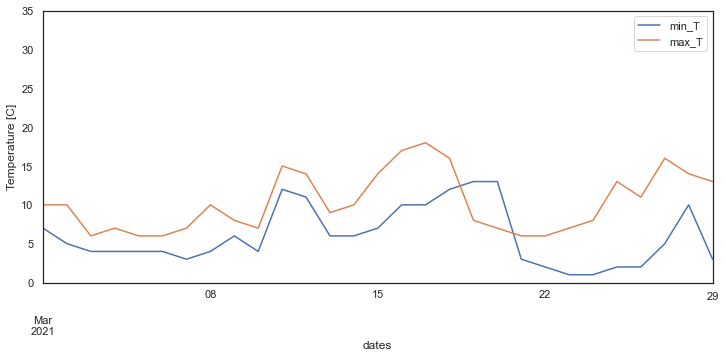

In [57]:
# plots - you don;t have to specify x because it's always the index
df.plot(y=['min_T', 'max_T'], figsize=(12,5))
plt.ylabel('Temperature [C]')
plt.ylim([0,35])
# somthing is wrong, the min is bigger than max.

In [56]:
#check on the bug.
df.loc[df['min_T']>df['max_T']]

,max_T,min_T
dates,,
2021-03-19,8,13
2021-03-20,7,13


## Resample
#### !!!!only works when the index is a datatime object.
#### down, e.g.
- df.resample('3D').mean()
- df.resample('2D').max()
#### up
- df.resample('8h').ffill()
- df.resample('8h').interpolate(method='linear')

### down

In [59]:
df.resample('3D').max()

,max_T,min_T
dates,,
2021-03-01,10,7
2021-03-04,7,4
2021-03-07,10,6
2021-03-10,15,12
2021-03-13,14,7
2021-03-16,18,12
2021-03-19,8,13
2021-03-22,8,2
2021-03-25,16,5


In [60]:
df.resample('3D').mean()

,max_T,min_T
dates,,
2021-03-01,8.666667,5.333333
2021-03-04,6.333333,4.000000
2021-03-07,8.333333,4.333333
2021-03-10,12.000000,9.000000
2021-03-13,11.000000,6.333333
2021-03-16,17.000000,10.666667
2021-03-19,7.000000,9.666667
2021-03-22,7.000000,1.333333
2021-03-25,13.333333,3.000000


### up

In [67]:
df.resample('8h').interpolate(method='linear') # see more details by every 8h per day.

,max_T,min_T
dates,,
2021-03-01 00:00:00,10.000000,7.000000
2021-03-01 08:00:00,10.000000,6.333333
2021-03-01 16:00:00,10.000000,5.666667
2021-03-02 00:00:00,10.000000,5.000000
2021-03-02 08:00:00,8.666667,4.666667
...,...,...
2021-03-27 16:00:00,14.666667,8.333333
2021-03-28 00:00:00,14.000000,10.000000
2021-03-28 08:00:00,13.666667,7.666667


### Rolling averages
Very recent: https://www.zeit.de/wissen/gesundheit/coronavirus-echtzeit-karte-deutschland-landkreise-infektionen-ausbreitung#diagramm-international
- df.rolling('3D').mean() 

In [72]:
df.rolling('3D').mean()
#df.rolling('7D').max()

,max_T,min_T
dates,,
2021-03-01,10.000000,7.000000
2021-03-02,10.000000,6.000000
2021-03-03,8.666667,5.333333
2021-03-04,7.666667,4.333333
2021-03-05,6.333333,4.000000
2021-03-06,6.333333,4.000000
2021-03-07,6.333333,3.666667
2021-03-08,7.666667,3.666667
2021-03-09,8.333333,4.333333


In [69]:
df

,max_T,min_T
dates,,
2021-03-01,10,7
2021-03-02,10,5
2021-03-03,6,4
2021-03-04,7,4
2021-03-05,6,4
2021-03-06,6,4
2021-03-07,7,3
2021-03-08,10,4
2021-03-09,8,6


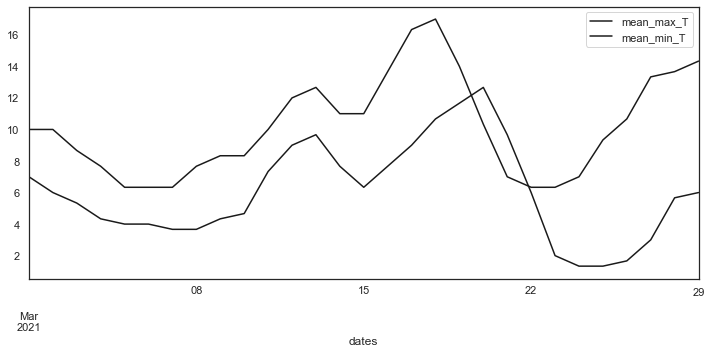

In [73]:
# plot
df.rolling('3D').mean().rename(columns={"max_T": "mean_max_T", "min_T": "mean_min_T"}).plot(figsize=(12,5),color = 'k')

In [ ]:
# plottting all together
ax = df.plot.line( y=['min_T', 'max_T'], figsize=(12,5), color = 'k', style="o")
df.rolling('3D').mean().rename(columns={"max_T": "mean_max_T", "min_T": "mean_min_T"}).plot(ax = ax)
plt.ylabel('Temperature [C]')
plt.ylim([0,35])